In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### __1. Criando Sianais para Treinamento__

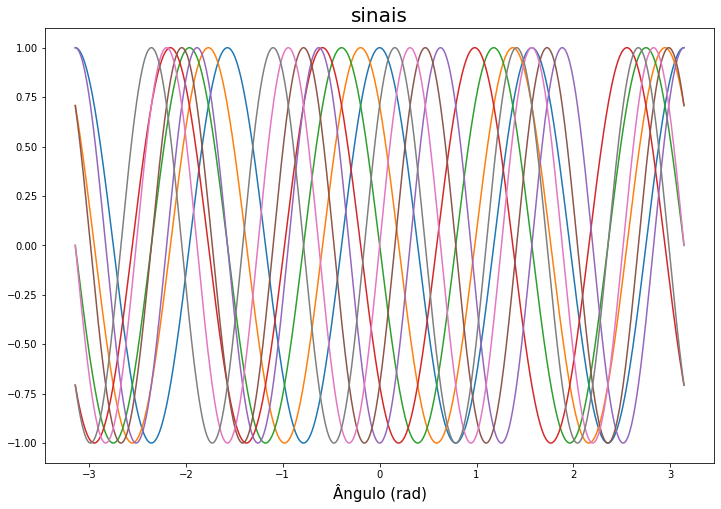

In [2]:
# Sinais variando de -pi a pi 
x = np.linspace(-np.pi, np.pi, 1001)
y1 = np.cos(4*x + 0*np.pi/4)
y2 = np.cos(4*x + 1*np.pi/4)
y3 = np.cos(4*x + 2*np.pi/4)
y4 = np.cos(4*x + 3*np.pi/4)
y5 = np.cos(5*x + 4*np.pi/4)
y6 = np.cos(5*x + 5*np.pi/4)
y7 = np.cos(5*x + 6*np.pi/4)
y8 = np.cos(5*x + 7*np.pi/4)

plt.figure(figsize=(12,8))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.plot(x, y5)
plt.plot(x, y6)
plt.plot(x, y7)
plt.plot(x, y8)

plt.xlabel('Ângulo (rad)', fontsize = 15)
plt.title('sinais', fontsize = 20)
plt.show()

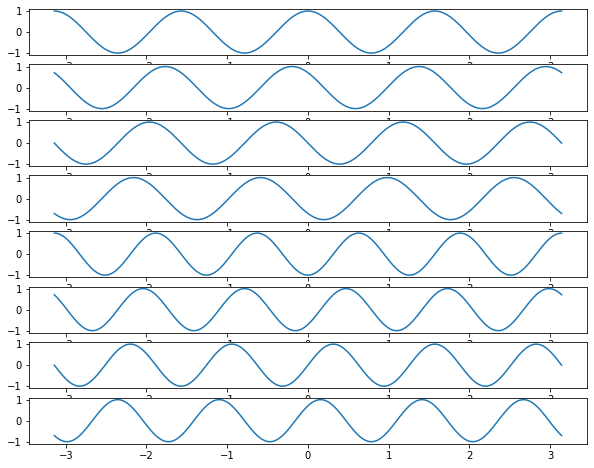

In [3]:
fig, ax = plt.subplots(8,1, figsize = (10,8))

ax[0].plot(x,y1)
ax[1].plot(x,y2)
ax[2].plot(x,y3)
ax[3].plot(x,y4)
ax[4].plot(x,y5)
ax[5].plot(x,y6)
ax[6].plot(x,y7)
ax[7].plot(x,y8)
plt.show()


In [4]:
#Modificando formato para bidimensional(necessário para entrada do autoencoder)
y1 = y1.reshape(-1,1)
y2 = y2.reshape(-1,1)
y3 = y3.reshape(-1,1)
y4 = y4.reshape(-1,1)
y5 = y5.reshape(-1,1)
y6 = y6.reshape(-1,1)
y7 = y7.reshape(-1,1)
y8 = y8.reshape(-1,1)

In [5]:
#Concatenando sinais
df = np.concatenate((y4,y7,y5,y1,y3,y2,y8,y6), axis = 1)

In [6]:
df

array([[-7.07106781e-01, -4.28626380e-16,  1.00000000e+00, ...,
         7.07106781e-01, -7.07106781e-01,  7.07106781e-01],
       [-7.24653130e-01, -3.14107591e-02,  9.99506560e-01, ...,
         6.89113808e-01, -7.28968627e-01,  6.84547106e-01],
       [-7.41741773e-01, -6.27905195e-02,  9.98026728e-01, ...,
         6.70685577e-01, -7.50111070e-01,  6.61311865e-01],
       ...,
       [-6.70685577e-01,  6.27905195e-02,  9.98026728e-01, ...,
         7.41741773e-01, -6.61311865e-01,  7.50111070e-01],
       [-6.89113808e-01,  3.14107591e-02,  9.99506560e-01, ...,
         7.24653130e-01, -6.84547106e-01,  7.28968627e-01],
       [-7.07106781e-01, -9.80336420e-16,  1.00000000e+00, ...,
         7.07106781e-01, -7.07106781e-01,  7.07106781e-01]])

In [7]:
df.shape

(1001, 8)

### __2. Construindo Autoencoder__

In [8]:
#Camada de de entrada e codificação (8x4)
l0 = keras.layers.Dense(4,input_shape = [8])
#Camadade de saída e decodificação (4x8)
l1 = keras.layers.Dense(8,input_shape = [4])


encoder = keras.models.Sequential([l0])

decoder = keras.models.Sequential([l1])

#Concatenando camadas
autoencoder = keras.models.Sequential([encoder, decoder])

#Compilando modelos
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.1))

#Treinando autoencoder - Dados de entradad == Dados de saída
history = autoencoder.fit(df,df,epochs=20)

Epoch 1/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3786
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1982
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1511
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1278
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1102
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0851
Epoch 7/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0518
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0244
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 9.3692e-04
Epoch 13/20
32/32 [==========================

### __3. Reconstruindo Sinais com Autoenconder__

In [9]:
#Sinal codificado
cod = encoder.predict(df)

In [10]:
cod

array([[-0.9581011 , -1.3363165 ,  0.45655155, -0.89651906],
       [-0.9585388 , -1.319193  ,  0.44614992, -0.9483359 ],
       [-0.9583376 , -1.3011318 ,  0.435146  , -0.99934036],
       ...,
       [-0.9552829 , -1.3677069 ,  0.4755004 , -0.79062736],
       [-0.95701796, -1.3524911 ,  0.46633887, -0.84393454],
       [-0.9581011 , -1.3363165 ,  0.45655155, -0.89651906]],
      dtype=float32)

In [11]:
cod.shape

(1001, 4)

In [12]:
#sinal decodificado
decod = decoder(cod)
decod

<tf.Tensor: shape=(1001, 8), dtype=float32, numpy=
array([[-0.70638335,  0.00223189,  1.0006356 , ...,  0.7054311 ,
        -0.70821667,  0.70506555],
       [-0.7239418 , -0.02921618,  1.0001316 , ...,  0.6874663 ,
        -0.73006   ,  0.68253994],
       [-0.7410434 , -0.06063534,  0.9986405 , ...,  0.6690677 ,
        -0.75118273,  0.6593407 ],
       ...,
       [-0.66994005,  0.06508999,  0.9986816 , ...,  0.74001527,
        -0.66245544,  0.748008  ],
       [-0.68837905,  0.03367763,  1.0001521 , ...,  0.72295105,
        -0.6856743 ,  0.72689545],
       [-0.70638335,  0.00223189,  1.0006356 , ...,  0.70543116,
        -0.70821667,  0.70506555]], dtype=float32)>

In [13]:
decod.shape

TensorShape([1001, 8])

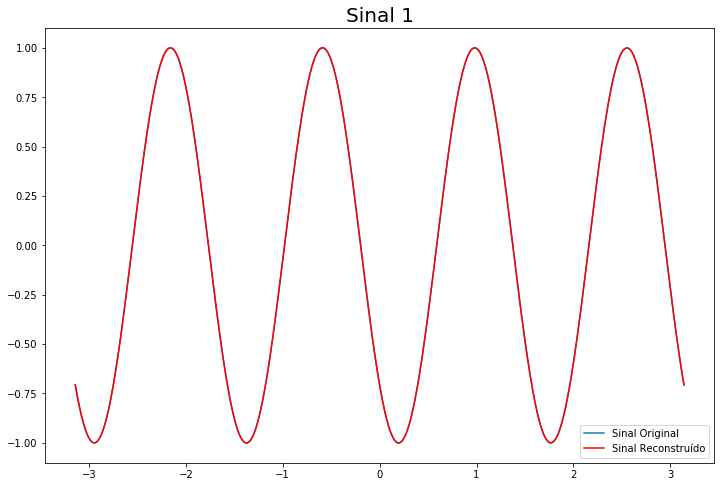

In [14]:
#plot
plt.figure(figsize = (12,8))
plt.plot(x, df[:,0])
plt.plot(x, decod[:,0], color = 'r')
plt.title("Sinal 1", fontsize = 20)
plt.legend(['Sinal Original', 'Sinal Reconstruído'])
plt.show()

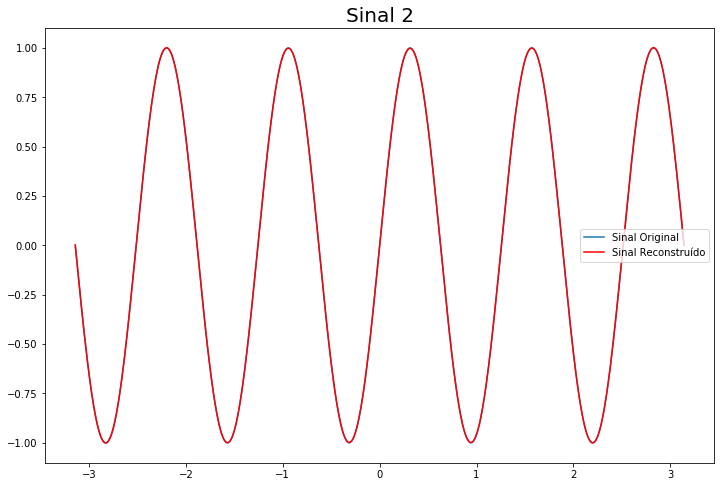

In [15]:
plt.figure(figsize = (12,8))
plt.plot(x, df[:,1])
plt.plot(x, decod[:,1], color = 'r')
plt.title("Sinal 2", fontsize = 20)
plt.legend(['Sinal Original', 'Sinal Reconstruído'])
plt.show()

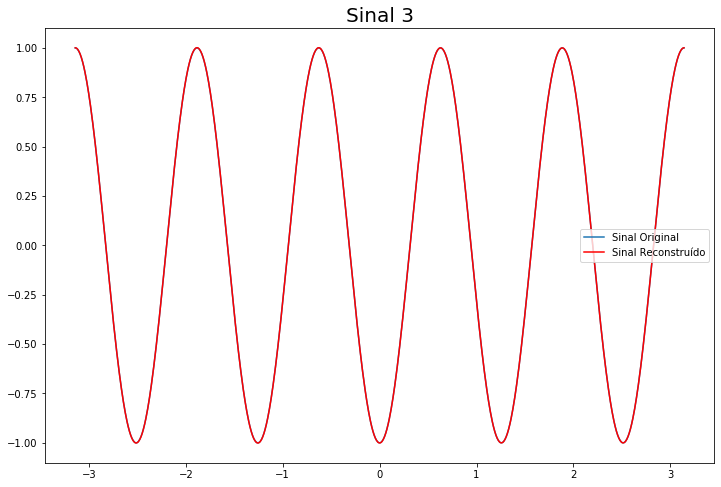

In [16]:
plt.figure(figsize = (12,8))
plt.plot(x, df[:,2])
plt.plot(x, decod[:,2], color = 'r')
plt.title("Sinal 3", fontsize = 20)
plt.legend(['Sinal Original', 'Sinal Reconstruído'])
plt.show()

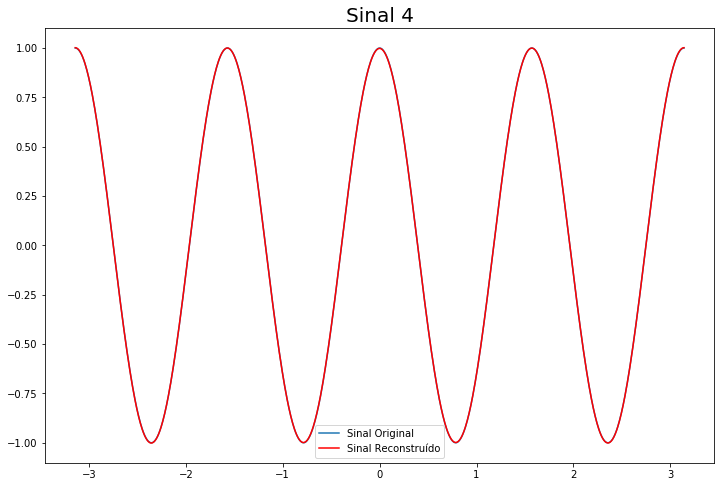

In [17]:
plt.figure(figsize = (12,8))
plt.plot(x, df[:,3])
plt.plot(x, decod[:,3], color = 'r')
plt.title("Sinal 4", fontsize = 20)
plt.legend(['Sinal Original', 'Sinal Reconstruído'])
plt.show()

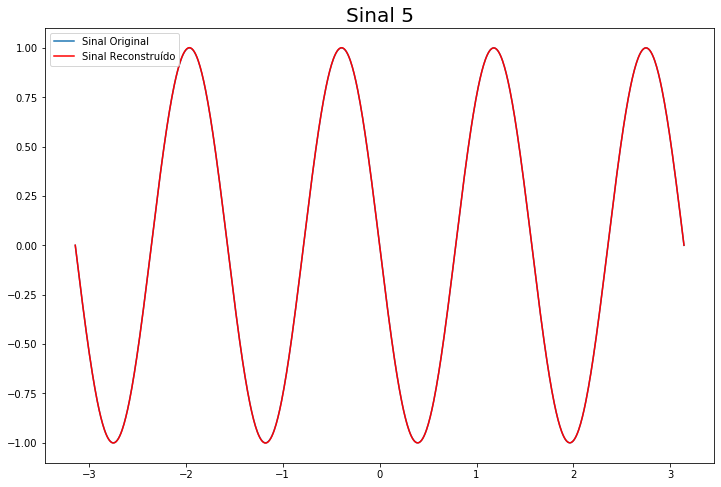

In [18]:
plt.figure(figsize = (12,8))
plt.plot(x, df[:,4])
plt.plot(x, decod[:,4], color = 'r')
plt.title("Sinal 5", fontsize = 20)
plt.legend(['Sinal Original', 'Sinal Reconstruído'])
plt.show()

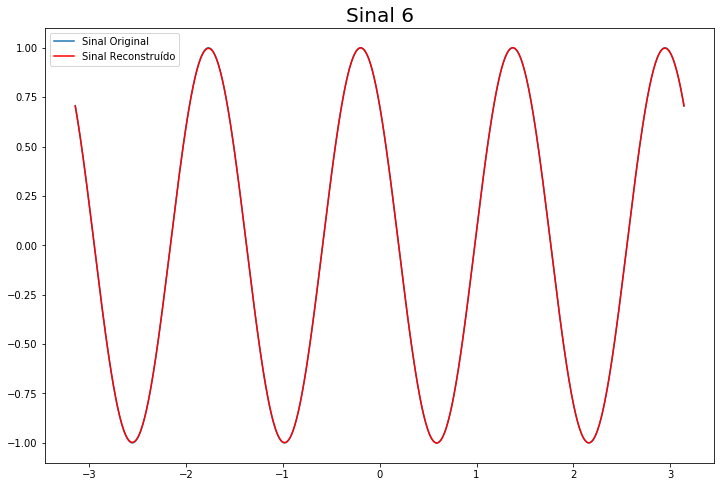

In [19]:
plt.figure(figsize = (12,8))
plt.plot(x, df[:,5])
plt.plot(x, decod[:,5], color = 'r')
plt.title("Sinal 6", fontsize = 20)
plt.legend(['Sinal Original', 'Sinal Reconstruído'])
plt.show()

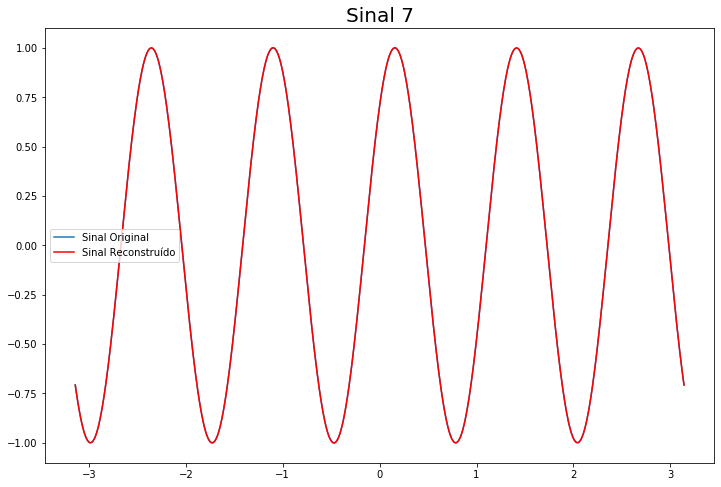

In [20]:
plt.figure(figsize = (12,8))
plt.plot(x, df[:,6])
plt.plot(x, decod[:,6], color = 'r')
plt.title("Sinal 7", fontsize = 20)
plt.legend(['Sinal Original', 'Sinal Reconstruído'])
plt.show()

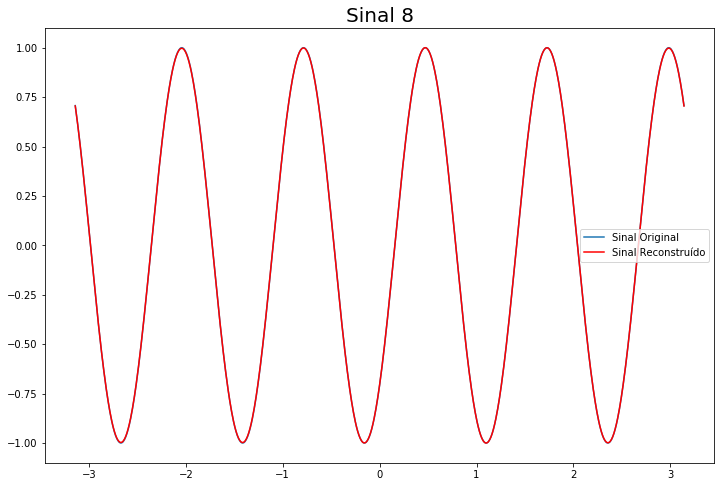

In [21]:
plt.figure(figsize = (12,8))
plt.plot(x, df[:,7])
plt.plot(x, decod[:,7], color = 'r')
plt.title("Sinal 8", fontsize = 20)
plt.legend(['Sinal Original', 'Sinal Reconstruído'])
plt.show()

### __Teste - Reconstrução de Sinais com Dado Espúrio__

In [22]:
#Escolhendo amostra
real = df[370]
real

array([ 0.61290705,  0.80901699,  0.58778525, -0.9921147 , -0.12533323,
       -0.79015501,  0.15643447,  0.98768834])

In [23]:
# Erro médio quadrático
mse = lambda x,y: ((x-y)**2).mean()

In [24]:
#Erro médio absoluto
mae = lambda x,y: abs(((x-y)).mean())

In [25]:
#Amostra com dado espúrio
missing= df[370].copy()
missing[2] = 10
print("Vetor original: {}".format(real))
print("Vetor espúrio: {}".format(missing))

Vetor original: [ 0.61290705  0.80901699  0.58778525 -0.9921147  -0.12533323 -0.79015501
  0.15643447  0.98768834]
Vetor espúrio: [ 0.61290705  0.80901699 10.         -0.9921147  -0.12533323 -0.79015501
  0.15643447  0.98768834]


In [26]:
param = missing

#Erro inicial 
erro = mse(missing ,real)


while erro>0.001:
  
    #Reconstroi o vetor
    vetor_reconstruido = decoder.predict(encoder.predict(np.expand_dims(param,0)))
   
    #Calcula erro
    erro = mae(param[2], vetor_reconstruido[0,2])

    print(erro, param[2], vetor_reconstruido[0,2])

    #Substitui valor reconstruído
    param[2] = vetor_reconstruido[0,2]



vetor_reconstruido

7.76466178894043 10.0 2.2353382
1.35890531539917 2.2353382110595703 0.8764329
0.23782414197921753 0.8764328956604004 0.63860875
0.0416218638420105 0.6386087536811829 0.5969869
0.007284402847290039 0.5969868898391724 0.5897025
0.0012747645378112793 0.5897024869918823 0.5884277
0.0002231597900390625 0.588427722454071 0.58820456


array([[ 0.6132187 ,  0.8101694 ,  0.58820456, -0.99123186, -0.12503186,
        -0.7909626 ,  0.15586005,  0.9868226 ]], dtype=float32)

In [27]:
print(real)
print(param)
print(vetor_reconstruido)
print("Erro final = {}".format(mae(param[2], real[2])))

[ 0.61290705  0.80901699  0.58778525 -0.9921147  -0.12533323 -0.79015501
  0.15643447  0.98768834]
[ 0.61290705  0.80901699  0.58820456 -0.9921147  -0.12533323 -0.79015501
  0.15643447  0.98768834]
[[ 0.6132187   0.8101694   0.58820456 -0.99123186 -0.12503186 -0.7909626
   0.15586005  0.9868226 ]]
Erro final = 0.00041931037155806816


#### __Função POCS: Projection Onto Convex Sets__  

In [28]:
def POCS (vetor_real, pos, valor_aleatorio ,encoder, decoder, verbose = False, show_results=True):

  
  
    erro = abs(vetor_real[pos] - valor_aleatorio)
    vetor_reconstruido = vetor_real.copy()
    vetor_reconstruido[pos] = valor_aleatorio

    count = 0
    vetor_erro = []
    vetor_valores = []


    while erro>0.001:
        count = count+1
        vetor_suporte = decoder.predict(encoder.predict(np.expand_dims(vetor_reconstruido,0)))
        erro = mae(vetor_reconstruido[pos] ,vetor_suporte[0,pos])

        vetor_reconstruido[pos] = vetor_suporte[0,pos]

        vetor_valores.append(vetor_reconstruido[pos])
        vetor_erro.append(erro)

        if verbose==True:
            print("Iteração: {}".format(count))
            print("Valor Real: {}".format(vetor_real[pos]))
            print("Valor Reconstruído no Loop: {}".format(vetor_reconstruido[pos]))
            print("Erro de Reconstrução no loop: {}".format(vetor_real[pos]- vetor_reconstruido[pos]))
            print("Erro de Comparação: {}".format(erro))
            print("---------------------------------------------\n")


    if show_results==True:
        
        print("Vetores:")
        print("Vetor Real: {}".format(vetor_real))
        print("Vetor Reconstruido {}".format(vetor_reconstruido))
        print("----------------------------------------------------------\n\n")


        fig, ax = plt.subplots(1,2, figsize = (20,6))

        ax[0].set_title("Reconstrução do valor", size = 20)
        ax[0].set_xlabel("Número de Iterações", size = 14)
        ax[0].set_ylabel("Valor Reconstruído", size = 14)
        ax[0].plot(range(1,count+1), vetor_valores, 'o')
        ax[0].hlines(vetor_real[pos], xmin=1, xmax=count+1, color = 'red')
        ax[0].legend(["Valor Reconstruído", "Valor Real"], loc = "center right")

        ax[1].set_title("Erro de reconstrução", size = 20)
        ax[1].set_xlabel("Número de Iterações", size = 14)
        ax[1].set_ylabel("Erro Absoluto", size = 14)
        ax[1].plot(range(1,count+1), vetor_erro, linewidth = 3)

    return vetor_reconstruido

Iteração: 1
Valor Real: 0.35641187871325136
Valor Reconstruído no Loop: -4.5971479415893555
Erro de Reconstrução no loop: 4.9535598203026066
Erro de Comparação: 4.4028520584106445
---------------------------------------------

Iteração: 2
Valor Real: 0.35641187871325136
Valor Reconstruído no Loop: -2.2659144401550293
Erro de Reconstrução no loop: 2.622326318868281
Erro de Comparação: 2.331233501434326
---------------------------------------------

Iteração: 3
Valor Real: 0.35641187871325136
Valor Reconstruído no Loop: -1.0315672159194946
Erro de Reconstrução no loop: 1.387979094632746
Erro de Comparação: 1.2343472242355347
---------------------------------------------

Iteração: 4
Valor Real: 0.35641187871325136
Valor Reconstruído no Loop: -0.37800174951553345
Erro de Reconstrução no loop: 0.7344136282287848
Erro de Comparação: 0.6535654664039612
---------------------------------------------

Iteração: 5
Valor Real: 0.35641187871325136
Valor Reconstruído no Loop: -0.03195028007030487
E

array([-0.91269159,  0.06279052,  0.99802673,  0.35679394, -0.93432894,
       -0.40864907, -0.66131187,  0.75011107])

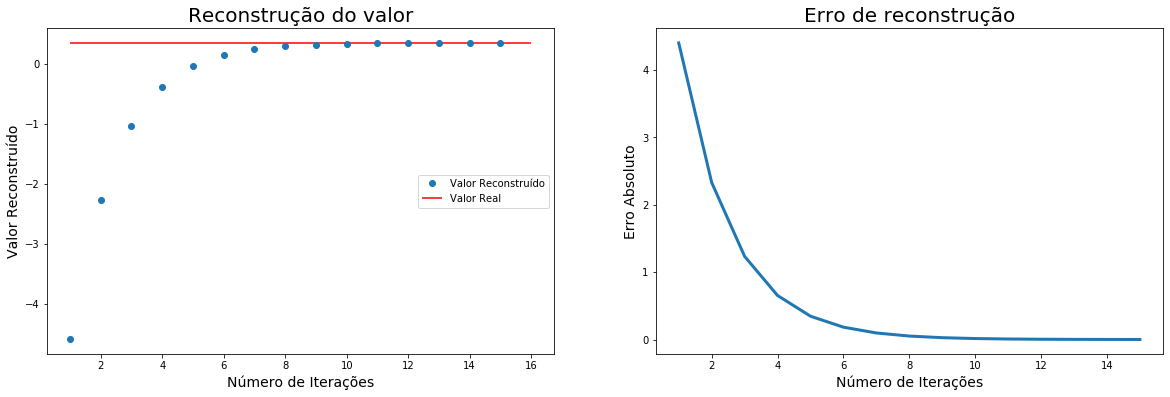

In [29]:
vetor = df[798]
pos = 3


POCS(vetor_real = vetor, pos = pos, valor_aleatorio=-9, encoder=encoder, decoder=decoder, verbose = True)

Iteração: 1
Valor Real: 0.992114701314478
Valor Reconstruído no Loop: -3.2847790718078613
Erro de Reconstrução no loop: 4.276893773122339
Erro de Comparação: 5.715220928192139
---------------------------------------------

Iteração: 2
Valor Real: 0.992114701314478
Valor Reconstruído no Loop: -0.8374420404434204
Erro de Reconstrução no loop: 1.8295567417578984
Erro de Comparação: 2.447337031364441
---------------------------------------------

Iteração: 3
Valor Real: 0.992114701314478
Valor Reconstruído no Loop: 0.21054194867610931
Erro de Reconstrução no loop: 0.7815727526383687
Erro de Comparação: 1.0479839891195297
---------------------------------------------

Iteração: 4
Valor Real: 0.992114701314478
Valor Reconstruído no Loop: 0.6593032479286194
Erro de Reconstrução no loop: 0.3328114533858586
Erro de Comparação: 0.44876129925251007
---------------------------------------------

Iteração: 5
Valor Real: 0.992114701314478
Valor Reconstruído no Loop: 0.8514690399169922
Erro de Recons

array([-0.54112125,  0.61290705, -0.79015501, -0.21200711, -0.97726812,
       -0.84094458,  0.99500328, -0.12533323])

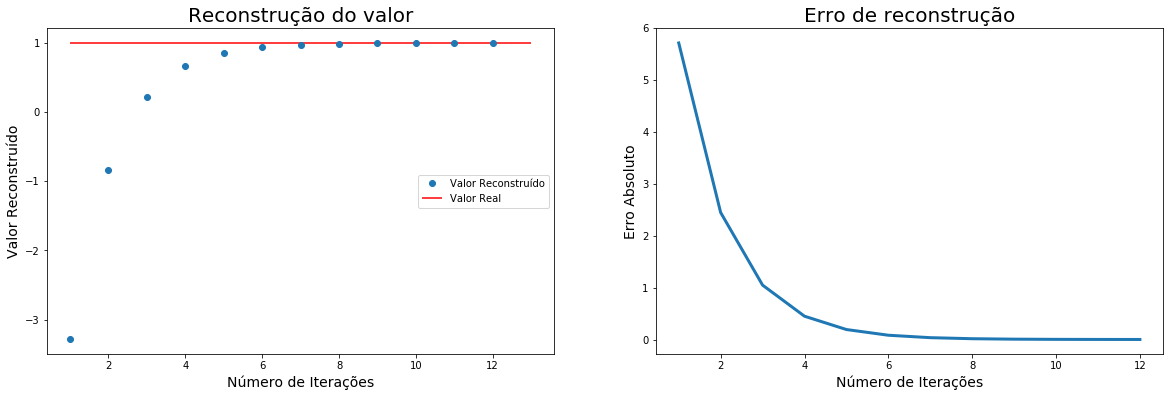

In [30]:
vetor = df[321]
pos = 6
valor = -9

POCS(vetor_real = vetor, pos = pos, valor_aleatorio=valor, encoder=encoder, decoder=decoder, verbose = True)

### __Busca Irrestrita__ 

In [31]:
#Instalando biblioteca pyswarms
# !pip install pyswarms

In [32]:
# Import PySwarms
import pyswarms as ps

In [33]:
def Busca_Irrestrita (vetor_real,  pos, valor_aleatorio, encoder, decoder):

    vetor_suporte = vetor_real.copy()
    vetor_suporte[pos] = valor_aleatorio
    vetor_reconstruido = decoder.predict(encoder.predict(np.expand_dims(vetor_suporte,0)))
    return mse(vetor_suporte[pos], vetor_reconstruido[0,pos])

In [34]:
#Vetor original
real = df[798]
vetor = real.copy()
vetor_reconstruido = real.copy()
pos = 3

#Vetor com dado espúrio
vetor[pos] = 10

In [35]:
Busca_Irrestrita(vetor_real = vetor, pos = pos, valor_aleatorio=valor, encoder=encoder, decoder=decoder)     

19.38510624825085

In [36]:
#Função para otimização
def f(x, vetor, pos, encoder, decoder):

    n_particles = x.shape[0]
    j = [Busca_Irrestrita(vetor,  pos, x[i], encoder, decoder) for i in range(n_particles)]
    return np.array(j)


In [37]:
%%time
# Hiperparâmetros
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}


# Instância do PSO
optimizer = ps.single.GlobalBestPSO(n_particles=100, dimensions=1, options=options)

# Otimização
custo, valor_reconstruido = optimizer.optimize(f, iters=10, vetor = vetor, pos =pos, encoder=encoder, decoder = decoder)

2020-07-15 10:12:22,418 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=4.98e-8
2020-07-15 10:13:47,621 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.9776849287959396e-08, best pos: [0.3569942]


CPU times: user 1min 22s, sys: 1.19 s, total: 1min 23s
Wall time: 1min 25s


In [38]:
vetor_reconstruido[pos] = valor_reconstruido
print("Vetor Original: {}".format(real))
print("Vetor Reconstruido: {}".format(vetor_reconstruido))
print("Erro: {}".format(real[pos] - vetor_reconstruido[pos]) )

Vetor Original: [-0.91269159  0.06279052  0.99802673  0.35641188 -0.93432894 -0.40864907
 -0.66131187  0.75011107]
Vetor Reconstruido: [-0.91269159  0.06279052  0.99802673  0.3569942  -0.93432894 -0.40864907
 -0.66131187  0.75011107]
Erro: -0.0005823258862756031


### __Busca Restrita__

In [39]:
def Busca_Restrita (vetor_real,  pos, valor_aleatorio, encoder, decoder):

    vetor_suporte = vetor_real.copy()
    vetor_suporte[pos] = valor_aleatorio
    vetor_reconstruido = decoder.predict(encoder.predict(np.expand_dims(vetor_suporte,0)))
    return mse(vetor_suporte, vetor_reconstruido)


In [40]:
def g(x,  vetor,  pos, encoder, decoder):

    n_particles = x.shape[0]
    j = [Busca_Restrita(vetor,  pos, x[i], encoder, decoder) for i in range(n_particles)]
    return np.array(j)


In [41]:
%%time
# Hiperparâmetros
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Instância PSO
optimizer = ps.single.GlobalBestPSO(n_particles=100, dimensions=1, options=options)

# Otimização
custo, valor_reconstruido2= optimizer.optimize(g, 
                                               iters=10, 
                                               vetor = vetor,
                                               pos = pos,
                                               encoder = encoder,
                                               decoder =  decoder)

2020-07-15 10:13:48,208 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=1.51e-7
2020-07-15 10:15:06,841 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.5065572066959592e-07, best pos: [0.35739328]


CPU times: user 1min 17s, sys: 1.17 s, total: 1min 19s
Wall time: 1min 18s


In [42]:
vetor_reconstruido[pos] = valor_reconstruido2
print("Vetor Original: {}".format(real))
print("Vetor Reconstruido: {}".format(vetor_reconstruido))
print("Erro: {}".format(real[pos] - vetor_reconstruido[pos]))

Vetor Original: [-0.91269159  0.06279052  0.99802673  0.35641188 -0.93432894 -0.40864907
 -0.66131187  0.75011107]
Vetor Reconstruido: [-0.91269159  0.06279052  0.99802673  0.35739328 -0.93432894 -0.40864907
 -0.66131187  0.75011107]
Erro: -0.0009813989174389248


### __Estudo de Caso: Substituindo Sensor__

In [43]:
missing_start = 470
missing_end = 570

sensor = 6
#valor_aleatorio = -9


df_teste = df.copy()

#Dados com 
df_teste[missing_start:missing_end, sensor] = 0

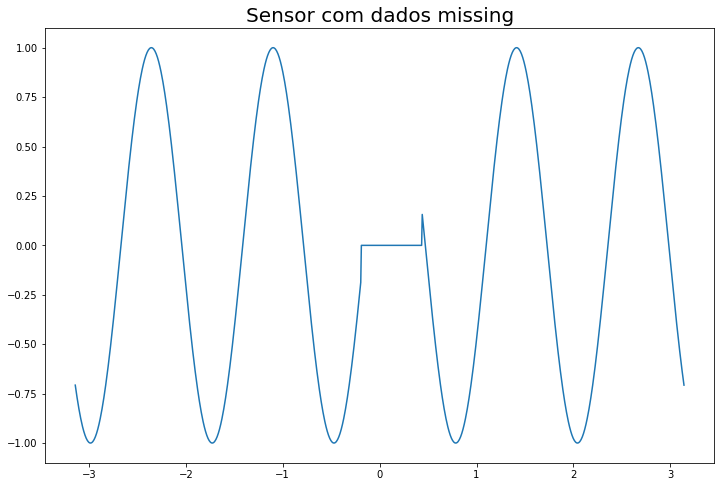

In [44]:
plt.figure(figsize = (12,8))
plt.plot(x, df_teste[:,sensor])

plt.title("Sensor com dados missing", fontsize = 20)

plt.show()

In [ ]:
#hiperparâmetros
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Instância PSO
optimizer = ps.single.GlobalBestPSO(n_particles=100, dimensions=1, options=options)

# Otimização

valores = []
for missing in range(missing_start, missing_end):
    
    
    custo, valor_reconstruido= optimizer.optimize(g, 
                                               iters=10, 
                                               vetor = df_teste[missing,:],
                                               pos = sensor,
                                               encoder = encoder,
                                               decoder =  decoder)
    valores.append(valor_reconstruido)
    
    

In [ ]:
vetor_valores = np.concatenate(valores, axis=0)

In [ ]:
vetor_valores.shape

In [ ]:
print('Erro Médio Absoluto: {}'.format(mae(vetor_valores, df[missing_start:missing_end, sensor])))

In [ ]:
df_teste[missing_start:missing_end, sensor] = np.nan

plt.figure(figsize = (12,8))
plt.plot(x, df_teste[:,6])
plt.plot(x[missing_start:missing_end], vetor_valores, 'ro')
plt.title("Sensor com dados missing", fontsize = 20)

plt.show()


In [45]:
vetor_reconstruido = []
for vetor in df_teste[missing_start:missing_end,:]:
    vetor_reconstruido.append(POCS(vetor, sensor, -9, encoder, decoder,verbose=False, show_results=False))

In [46]:
vetor_valores = [v[6] for v in vetor_reconstruido]
vetor_valores

[-0.15669406950473785,
 -0.12550711631774902,
 -0.09419683367013931,
 -0.0627942904829979,
 -0.03133039176464081,
 0.00016380235319957137,
 0.03165704756975174,
 0.06311873346567154,
 0.09451761096715927,
 0.12582221627235413,
 0.15700232982635498,
 0.18802696466445923,
 0.21886540949344635,
 0.24948757886886597,
 0.2798627018928528,
 0.3099612891674042,
 0.3397534489631653,
 0.3692096769809723,
 0.3983013331890106,
 0.4269993007183075,
 0.4552755057811737,
 0.48310205340385437,
 0.5104513764381409,
 0.5372965335845947,
 0.5636112093925476,
 0.5893691182136536,
 0.6145451068878174,
 0.6391142010688782,
 0.6630522012710571,
 0.686335563659668,
 0.7089414596557617,
 0.7308473587036133,
 0.7520317435264587,
 0.7724737524986267,
 0.7921529412269592,
 0.8110502362251282,
 0.8291471600532532,
 0.8464253544807434,
 0.8628681302070618,
 0.8784589767456055,
 0.8931829929351807,
 0.9070254564285278,
 0.9199724197387695,
 0.9320114254951477,
 0.9431307315826416,
 0.9533190727233887,
 0.9625662565

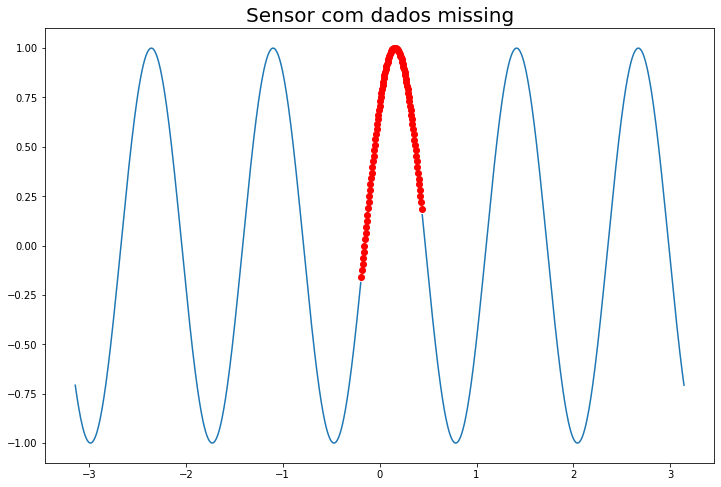

In [47]:
df_teste[missing_start:missing_end, sensor] = np.nan

plt.figure(figsize = (12,8))
plt.plot(x, df_teste[:,6])
plt.plot(x[missing_start:missing_end], vetor_valores, 'ro')
plt.title("Sensor com dados missing", fontsize = 20)

plt.show()

In [50]:
print("Erro Médio Absoluto - Pocs {}".format(mae(np.array(vetor_valores), df[missing_start:missing_end,sensor])))

Erro Médio Absoluto - Pocs 0.0014375961761013854
